In [3]:
from DB_utils import *

import pandas as pd
import numpy as np
import geopandas as gpd
import json
import matplotlib.pyplot as plt

import shapely

In [29]:
data_metro_street = pd.read_csv("data/crime_data/2025-02/2025-02-metropolitan-street.csv")
data_metro_outcomes = pd.read_csv("data/crime_data/2025-02/2025-02-metropolitan-outcomes.csv")

data_merseyside_stop_search = pd.read_csv("data/crime_data/2025-02/2025-02-merseyside-stop-and-search.csv")

In [13]:
data_metro_street[data_metro_street["LSOA code"] == 'E02000976']

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context


In [11]:
data_metro_outcomes.head()


,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Outcome type
0,a9ca87b9ebc0871c6104224424344c77fd0f7a7c298fa6...,2025-02,Metropolitan Police Service,Metropolitan Police Service,-0.198700,51.579558,On or near Portsdown Mews,E01000216,Barnet 035E,Unable to prosecute suspect
1,8027361839a444ec6d18ba3cd1ae01449ad1344a7b72f6...,2025-02,Metropolitan Police Service,Metropolitan Police Service,-4.039378,51.711872,On or near Coedbach Road,W01000846,Swansea 001B,Unable to prosecute suspect
2,2fb1d1f4852efb16255b5895ed9ec4730a7dad1b163083...,2025-02,Metropolitan Police Service,Metropolitan Police Service,-0.143823,51.539595,On or near Shopping Area,E01000863,Camden 021A,Unable to prosecute suspect
3,4e6fb44d556a41aa3a5b3fefdc3ee060288c586420a145...,2025-02,Metropolitan Police Service,Metropolitan Police Service,-0.446066,51.559562,On or near Long Lane,E01002463,Hillingdon 013B,Unable to prosecute suspect
4,e9658eb0bdd8f345c42e66eb4bf8ae719600195216061f...,2025-02,Metropolitan Police Service,Metropolitan Police Service,-0.071376,51.589702,On or near Library Court,E01001979,Haringey 011D,Unable to prosecute suspect


In [18]:
data_metro_street['Crime ID'][0]

'e8a04351172423f56f4abf6fc6ca6c906c347369aeaf74327cd909347971efaf'

In [14]:
len(data_metro_street[pd.notna(data_metro_street['Crime ID'])])

68414

In [17]:
data_merseyside_stop_search.head()

,Type,Date,Part of a policing operation,Policing operation,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing
0,Person search,2025-02-01T00:00:50+00:00,NaN,NaN,53.410921,-2.839433,Male,10-17,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Articles for use in criminal damage,A no further action disposal,NaN,False
1,Person search,2025-02-01T00:03:13+00:00,NaN,NaN,53.436113,-2.975888,Male,25-34,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,NaN,False
2,Person search,2025-02-01T00:03:27+00:00,NaN,NaN,53.405308,-2.987924,Male,10-17,White - Any other White background,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Community resolution,True,False
3,Person and Vehicle search,2025-02-01T00:05:33+00:00,NaN,NaN,53.457551,-2.847627,Male,25-34,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,NaN,False
4,Person search,2025-02-01T00:27:22+00:00,NaN,NaN,53.404497,-2.983799,Male,18-24,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,NaN,False


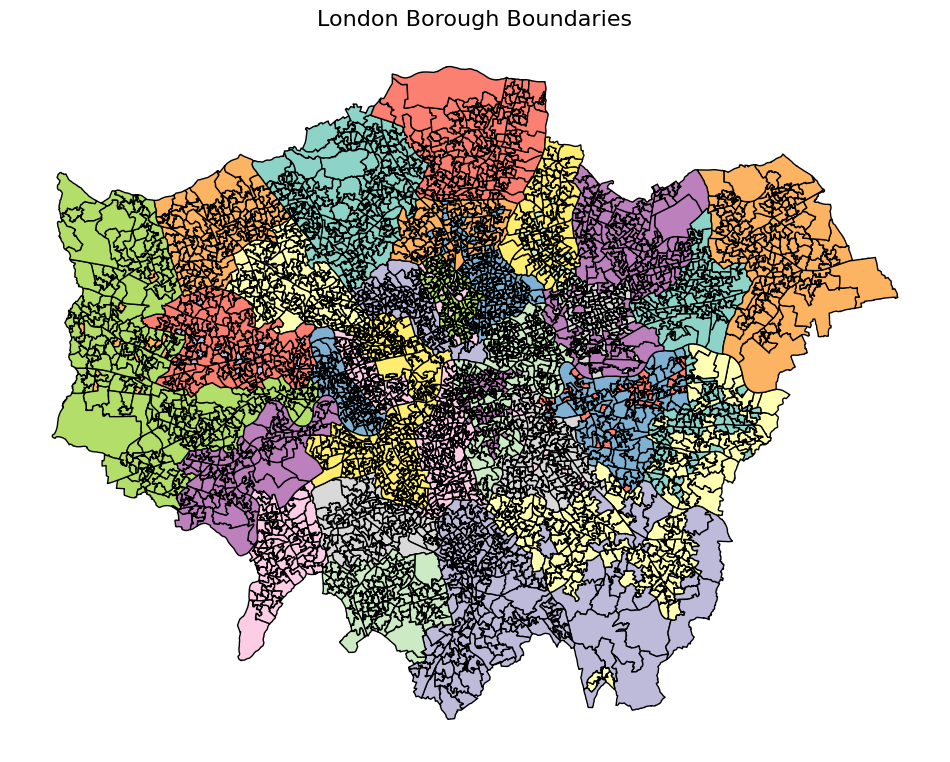

In [14]:
import geopandas as gpd
import matplotlib.pyplot as plt
import os

# Set the parent directory path where all borough folders/files are located
parent_folder = r"C:\Users\20223112\Downloads\LB_LSOA2021_shp\LB_shp"

# Initialize an empty list to store GeoDataFrames
gdfs = []

# Loop through all files in the folder
for file in os.listdir(parent_folder):
    if file.endswith(".shp"):
        filepath = os.path.join(parent_folder, file)
        try:
            gdf = gpd.read_file(filepath)
            gdfs.append(gdf)
        except Exception as e:
            print(f"Failed to load {file}: {e}")

# Combine all GeoDataFrames into one
all_boroughs = gpd.GeoDataFrame(pd.concat(gdfs, ignore_index=True))

# Plot
fig, ax = plt.subplots(figsize=(12, 12))
all_boroughs.plot(ax=ax, edgecolor="black", column=None, cmap="Set3")
ax.set_title("London Borough Boundaries", fontsize=16)
ax.axis("off")
plt.show()


In [15]:
gdf

,lsoa21cd,lsoa21nm,msoa21cd,msoa21nm,lad22cd,lad22nm,geometry
0,E01004651,Westminster 003A,E02000962,Westminster 003,E09000033,Westminster,"POLYGON ((526517.046 183265.138, 526526.064 18..."
1,E01004652,Westminster 017A,E02000976,Westminster 017,E09000033,Westminster,"POLYGON ((525940 181376, 525940 181367.682, 52..."
2,E01004653,Westminster 014A,E02000973,Westminster 014,E09000033,Westminster,"POLYGON ((525302.016 181371.8, 525304.4 181369..."
3,E01004674,Westminster 005A,E02000964,Westminster 005,E09000033,Westminster,"POLYGON ((524805.806 182518.157, 524800.345 18..."
4,E01004676,Westminster 006A,E02000965,Westminster 006,E09000033,Westminster,"POLYGON ((525458.566 182358.586, 525460.063 18..."
...,...,...,...,...,...,...,...
118,E01004727,Westminster 008D,E02000967,Westminster 008,E09000033,Westminster,"POLYGON ((527686.246 183502.219, 527697.728 18..."
119,E01035716,Westminster 013G,E02000972,Westminster 013,E09000033,Westminster,"POLYGON ((529365.209 181301.039, 529349.069 18..."
120,E01004731,Westminster 020A,E02000979,Westminster 020,E09000033,Westminster,"POLYGON ((529396.801 179907.419, 529469.883 17..."
121,E01004736,Westminster 018C,E02000977,Westminster 018,E09000033,Westminster,"POLYGON ((529666.73 180792.554, 529667.7 18079..."


In [ ]:
def list_lsoa_data_files(parent_path: str= "data/LB_shp/") -> list[str]:
    shp_files = []
    for dirpath, dirnames, filenames in os.walk(parent_path):
        for file in filenames:
            if file.endswith(".shp"):
                shp_files.append(os.path.join(dirpath, file))

    return shp_files


def combine_all_lsoa_data_files(list_of_shp_file_paths: list[str]) -> pd.DataFrame:
    gdfs = []

    for file_path in list_of_shp_file_paths:
        gdfs.append(gpd.read_file(file_path))
    
    return gpd.GeoDataFrame(pd.concat(gdfs, ignore_index=True))

In [9]:
from DB_utils import DBhandler
import pandas

db_handler = DBhandler(db_name="crime_data_UK_v2.db")

resulting_df = db_handler.query("SELECT name FROM sqlite_master WHERE type='table';")

db_handler.close_connection_db()


Established connection with database!


Connection successfully closed!



In [10]:
resulting_df

,name
0,force_districts
1,crime
2,existing_crime_ids
3,lsoa_location
4,ward_location
5,imd_data


In [13]:
db_handler.open_connection_db()

district_data = db_handler.query("SELECT * FROM force_districts")
crime_data = db_handler.query("SELECT * FROM crime LIMIT 100")
lsoa_loc_data = db_handler.query("SELECT * FROM lsoa_location")

tmp_df = db_handler.query("SELECT * FROM imd_data LIMIT 1000")

db_handler.close_connection_db()


Connection Opened!


Connection successfully closed!



In [14]:
tmp_df.head()

,uuid_imd,feature_code,measurement,value,indices_of_deprivation
0,1,E01005278,Rank,11281.0,b. Income Deprivation Domain
1,2,E01006616,Decile,1.0,a. Index of Multiple Deprivation (IMD)
2,3,E01005236,Rank,4565.0,b. Income Deprivation Domain
3,4,E01031873,Rank,25826.0,b. Income Deprivation Domain
4,5,E01007367,Decile,2.0,a. Index of Multiple Deprivation (IMD)


In [88]:
ward_loc = gpd.read_file("data/Wards_December_2016_Boundaries_UK_BFE_2022_-5810284385438997272")
ward_loc.head()

,WD16CD,WD16NM,WD16NMW,LAD16CD,LAD16NM,BNG_E,BNG_N,LONG,LAT,geometry
0,E05000026,Abbey,None,E09000002,Barking and Dagenham,544434,184378,0.081291,51.5398,"POLYGON ((545296.396 184162.603, 545109.299 18..."
1,E05000027,Alibon,None,E09000002,Barking and Dagenham,549247,185196,0.150987,51.5459,"POLYGON ((547932.4 184916.597, 547944.8 184924..."
2,E05000028,Becontree,None,E09000002,Barking and Dagenham,546863,185869,0.116912,51.5526,"POLYGON ((546209.396 185783.599, 546219.299 18..."
3,E05000029,Chadwell Heath,None,E09000002,Barking and Dagenham,548266,189340,0.138596,51.5834,"POLYGON ((548881.002 191087.601, 548877.3 1910..."
4,E05000030,Eastbrook,None,E09000002,Barking and Dagenham,550774,186272,0.173453,51.5552,"POLYGON ((551552.897 187363.397, 551554.802 18..."


In [94]:
temp = pd.read_csv("data/imd2019lsoa.csv")

In [95]:
temp.reset_index()

,index,FeatureCode,DateCode,Measurement,Units,Value,Indices of Deprivation
0,0,E01005278,2019,Rank,NaN,11281.000,b. Income Deprivation Domain
1,1,E01006616,2019,Decile,NaN,1.000,a. Index of Multiple Deprivation (IMD)
2,2,E01005236,2019,Rank,NaN,4565.000,b. Income Deprivation Domain
3,3,E01031873,2019,Rank,NaN,25826.000,b. Income Deprivation Domain
4,4,E01007367,2019,Decile,NaN,2.000,a. Index of Multiple Deprivation (IMD)
...,...,...,...,...,...,...,...
985315,985315,E01018830,2019,Score,NaN,11.350,a. Index of Multiple Deprivation (IMD)
985316,985316,E01019284,2019,Score,NaN,31.536,a. Index of Multiple Deprivation (IMD)
985317,985317,E01024778,2019,Rank,NaN,18324.000,g. Barriers to Housing and Services Domain
985318,985318,E01024832,2019,Rank,NaN,23566.000,g. Barriers to Housing and Services Domain


In [93]:
temp[(temp["FeatureCode"] == "E01005278") & (temp["Measurement"] == "Rank")].sort_values(by="Indices of Deprivation")

,FeatureCode,DateCode,Measurement,Units,Value,Indices of Deprivation
751105,E01005278,2019,Rank,NaN,9632.0,a. Index of Multiple Deprivation (IMD)
0,E01005278,2019,Rank,NaN,11281.0,b. Income Deprivation Domain
57357,E01005278,2019,Rank,NaN,20494.0,c. Employment Deprivation Domain
215464,E01005278,2019,Rank,NaN,11055.0,"d. Education, Skills and Training Domain"
186225,E01005278,2019,Rank,NaN,8562.0,e. Health Deprivation and Disability Domain
974887,E01005278,2019,Rank,NaN,2448.0,f. Crime Domain
784684,E01005278,2019,Rank,NaN,5228.0,g. Barriers to Housing and Services Domain
806662,E01005278,2019,Rank,NaN,8878.0,h. Living Environment Deprivation Domain
174318,E01005278,2019,Rank,NaN,6181.0,i. Income Deprivation Affecting Children Index...
766757,E01005278,2019,Rank,NaN,5103.0,j. Income Deprivation Affecting Older People I...


In [12]:
import pandas as pd

df = pd.read_csv("temp_results.csv")
df.head()

C:\Users\didde\AppData\Local\Temp\ipykernel_35744\3341305392.py:3: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("temp_results.csv")


,Unnamed: 0,crime_id,month,reported_by,falls_within,long,lat,location,lsoa_code,crime_type,last_outcome_category,uuid_imd,feature_code,measurement,value,indices_of_deprivation,geometry,index_right,ward_code,ward_name
0,0,288dbdaa9724c584c5a2e6efe5c0294ae10548490f3570...,2022-04,City of London Police,City of London Police,-0.111962,51.518494,On or near Nightclub,E01000914,Theft from the person,Investigation complete; no suspect identified,254509.0,E01000914,Decile,8.0,"d. Education, Skills and Training Domain",POINT (-0.111962 51.518494),112.0,E05000138,Holborn and Covent Garden
1,1,d05ac5361e6243053f5a983ec92647c74e49aa091f930e...,2022-04,City of London Police,City of London Police,-0.098572,51.516767,On or near King Edward Street,E01000001,Bicycle theft,Investigation complete; no suspect identified,409752.0,E01000001,Decile,10.0,"d. Education, Skills and Training Domain",POINT (-0.098572 51.516767),5688.0,E05009304,Farringdon Within
2,2,2bf5b4d9766e08247f29482a5552c2387162900f138ebc...,2022-04,City of London Police,City of London Police,-0.098062,51.517577,On or near Montague Street,E01000001,Bicycle theft,Investigation complete; no suspect identified,409752.0,E01000001,Decile,10.0,"d. Education, Skills and Training Domain",POINT (-0.098062 51.517577),5688.0,E05009304,Farringdon Within
3,3,40c47b2d00a0c282627673875932c61bc47127fb2a035b...,2022-04,City of London Police,City of London Police,-0.097736,51.520206,On or near Conference/Exhibition Centre,E01000001,Burglary,Investigation complete; no suspect identified,409752.0,E01000001,Decile,10.0,"d. Education, Skills and Training Domain",POINT (-0.097736 51.520206),5688.0,E05009304,Farringdon Within
4,4,17b08b53f7fe3f4feae48ac055ab47847ee926f06f96b0...,2022-04,City of London Police,City of London Police,-0.097736,51.520206,On or near Conference/Exhibition Centre,E01000001,Burglary,Investigation complete; no suspect identified,409752.0,E01000001,Decile,10.0,"d. Education, Skills and Training Domain",POINT (-0.097736 51.520206),5688.0,E05009304,Farringdon Within


In [13]:
df[pd.notna(df["ward_code"])]

,Unnamed: 0,crime_id,month,reported_by,falls_within,long,lat,location,lsoa_code,crime_type,last_outcome_category,uuid_imd,feature_code,measurement,value,indices_of_deprivation,geometry,index_right,ward_code,ward_name
0,0,288dbdaa9724c584c5a2e6efe5c0294ae10548490f3570...,2022-04,City of London Police,City of London Police,-0.111962,51.518494,On or near Nightclub,E01000914,Theft from the person,Investigation complete; no suspect identified,254509.0,E01000914,Decile,8.0,"d. Education, Skills and Training Domain",POINT (-0.111962 51.518494),112.0,E05000138,Holborn and Covent Garden
1,1,d05ac5361e6243053f5a983ec92647c74e49aa091f930e...,2022-04,City of London Police,City of London Police,-0.098572,51.516767,On or near King Edward Street,E01000001,Bicycle theft,Investigation complete; no suspect identified,409752.0,E01000001,Decile,10.0,"d. Education, Skills and Training Domain",POINT (-0.098572 51.516767),5688.0,E05009304,Farringdon Within
2,2,2bf5b4d9766e08247f29482a5552c2387162900f138ebc...,2022-04,City of London Police,City of London Police,-0.098062,51.517577,On or near Montague Street,E01000001,Bicycle theft,Investigation complete; no suspect identified,409752.0,E01000001,Decile,10.0,"d. Education, Skills and Training Domain",POINT (-0.098062 51.517577),5688.0,E05009304,Farringdon Within
3,3,40c47b2d00a0c282627673875932c61bc47127fb2a035b...,2022-04,City of London Police,City of London Police,-0.097736,51.520206,On or near Conference/Exhibition Centre,E01000001,Burglary,Investigation complete; no suspect identified,409752.0,E01000001,Decile,10.0,"d. Education, Skills and Training Domain",POINT (-0.097736 51.520206),5688.0,E05009304,Farringdon Within
4,4,17b08b53f7fe3f4feae48ac055ab47847ee926f06f96b0...,2022-04,City of London Police,City of London Police,-0.097736,51.520206,On or near Conference/Exhibition Centre,E01000001,Burglary,Investigation complete; no suspect identified,409752.0,E01000001,Decile,10.0,"d. Education, Skills and Training Domain",POINT (-0.097736 51.520206),5688.0,E05009304,Farringdon Within
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3326178,3326178,009820fb60ddcc10b318faa3d9c0261b1c6b8f7b046d57...,2025-03,Metropolitan Police Service,Metropolitan Police Service,-0.133246,51.488997,On or near Bessborough Street,E01004741,Anti-social behaviour,NaN,273332.0,E01004741,Decile,9.0,"d. Education, Skills and Training Domain",POINT (-0.133246 51.488997),565.0,E05000645,Tachbrook
3326179,3326179,2ff8ad592af3edd37a71da0f44f0a6d2fb339192c17dee...,2025-03,Metropolitan Police Service,Metropolitan Police Service,-0.133246,51.488997,On or near Bessborough Street,E01004741,Anti-social behaviour,NaN,273332.0,E01004741,Decile,9.0,"d. Education, Skills and Training Domain",POINT (-0.133246 51.488997),565.0,E05000645,Tachbrook
3326180,3326180,0f1d4e132898be1725f952d2d721f904da4934c06b870f...,2025-03,Metropolitan Police Service,Metropolitan Police Service,-0.137230,51.486309,On or near Parking Area,E01035722,Anti-social behaviour,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-0.13723 51.486309),565.0,E05000645,Tachbrook
3326181,3326181,9aba68521b224c878a9089b81b1be5cd39f335413071e5...,2025-03,Metropolitan Police Service,Metropolitan Police Service,-0.133538,51.487500,On or near Aylesford Street,E01035722,Anti-social behaviour,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-0.133538 51.4875),565.0,E05000645,Tachbrook


In [14]:
df_grouped = df.groupby(by="ward_code").agg(
    imd_val=("value", "mean"),
    num_of_crimes=("crime_id", "count")
)

df_grouped.head()

,imd_val,num_of_crimes
ward_code,,
E05000026,5.980019,11398
E05000027,3.667483,2860
E05000028,3.699253,3960
E05000029,3.464008,3987
E05000030,4.488897,2747


In [15]:
correlation = df_grouped["imd_val"].corr(df_grouped["num_of_crimes"])
print(correlation)

0.1243399141015441


In [16]:
len(df_grouped)

3799

In [17]:
df_grouped.sort_values(by="imd_val", ascending=False)

,imd_val,num_of_crimes
ward_code,,
E05006565,10.0,1
E05006560,10.0,2
E05001381,10.0,1
E05004726,10.0,9
E05004719,10.0,2
...,...,...
W05000975,NaN,2
W05000979,NaN,1
W05000987,NaN,1
